CNNの勉強
MNISTデータセットを使う5層のCNNモデルを作成する
CPUで2.5時間、GPUを使えばそれより早い学習時間になる

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [15]:
# Load the data
train = pd.read_csv("../data/cnn_train.csv")
test = pd.read_csv("../data/cnn_test.csv")

# Preprocessing

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

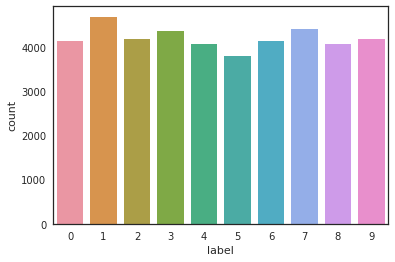

In [16]:
#学習データをラベルと分割
X_train = train.drop(columns='label')
y_train = train['label']

del train

#データ数確認
g = sns.countplot(y_train)
y_train.value_counts()

In [17]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [18]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [19]:
#正規化

#明るさの違いを減らすため、グレースケール化する(今回のMNISTは元からグレースケール画像)
#また、CNNは[0...255]より[0...1]の方が早く収束する

X_train = X_train/255.0
test = test/255.0

In [20]:
#Reshape

#trainもtestも28*28の784値を持つ1Dベクトル画像
#これを28*28の3Dマトリックスに再構成する

# MNIST画像はグレースケールであるため、1つのチャンネルのみを使用する
#RGB画像の場合、3つのチャンネルがあり、784pxベクトルを28x28x3の3Dマトリックスに再構成する
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [21]:
#Label Encoding

#0~9まであるラベルを1つのホットベクトルに変換する
#例：2 -> [0,0,1,0,0,0,0,0,0,0]
y_train = to_categorical(y_train, num_classes=10)

In [22]:
#trainとtest分割
X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=2)

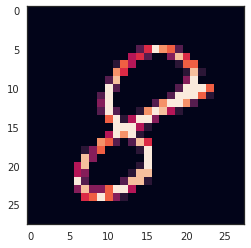

In [23]:
#Image visualization
g = plt.imshow(X_train[0][:,:,0])

# CNN Modeling

## Architecture

In -> 2*(2*(Conv2D -> ReLU) -> MaxPool2D -> Droput) -> Flatten -> Dence -> Dropout -> Out

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                 activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Parameters
スコア関数、損失関数、最適化アルゴリズムを設定

In [25]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy",
              metrics=["accuracy"])